<a href="https://colab.research.google.com/github/JeongSeongHun054/ProcessOperationProject/blob/main/(%EC%84%B1%ED%9B%88)%EA%B3%B5%EC%A0%95%EC%9A%B4%EC%98%81_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

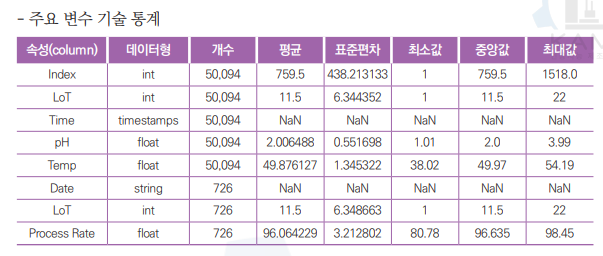

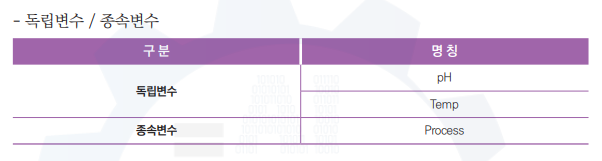

In [24]:
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install autokeras
# !pip install seaborn
# !pip install tensorflow
# !pip install datetime
# !pip install matplotlib
# !pip install pydot
# !pip install graphviz

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import tree
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [26]:
root_dir = '/content/dataset'
f_lists = os.listdir(root_dir)
print("File Lists : ", f_lists)

File Lists :  ['kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.26.csv', 'kemp-abh-sensor-2021.10.21.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.27.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.10.25.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-process-rate.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-ab

In [27]:
new_file_lists = [f for f in f_lists if f.endswith('.csv')]
print("File Lists : ", new_file_lists)


File Lists :  ['kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.26.csv', 'kemp-abh-sensor-2021.10.21.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.27.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.10.25.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-process-rate.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-ab

In [28]:
print(type(new_file_lists))
new_file_lists.sort()
data_lists = new_file_lists[:-1]
error_list = new_file_lists[-1]
print("Data Lists : ", data_lists)
print("Error Data List : ", error_list)

<class 'list'>
Data Lists :  ['kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2

In [29]:
def csv_read_(data_dir, data_list):
    tmp = pd.read_csv(os.path.join(data_dir, data_list), sep=',', encoding='UTF8')
    y, m, d =map(int, data_list.split('-')[-1].split('.')[:-1])
    time = tmp['Time']
    tmp['DTime'] ='-'.join(data_list.split('-')[-1].split('.')[:-1])
    ctime = time.apply(lambda _ : _.replace(u'오후', 'PM').replace(u'오전', 'AM'))
    n_time = ctime.apply(lambda _ : datetime.datetime.strptime(_, "%p %I:%M:%S"))
    newtime = n_time.apply(lambda _ : _.replace(year=y, month=m, day=d))
    tmp['Time'] = newtime
    return tmp

In [30]:
dd = csv_read_(root_dir, data_lists[0])
for i in range(1, len(data_lists)):
    dd = pd.merge(dd, csv_read_(root_dir, data_lists[i]), how='outer')
dd

,Index,LoT,Time,pH,Temp,DTime
0,1,1,2021-09-06 09:01:18,1.02,47.18,2021-09-06
1,2,1,2021-09-06 09:01:23,1.05,47.34,2021-09-06
2,3,1,2021-09-06 09:01:28,1.09,48.45,2021-09-06
3,4,1,2021-09-06 09:01:33,1.12,48.46,2021-09-06
4,5,1,2021-09-06 09:01:38,1.15,48.47,2021-09-06
...,...,...,...,...,...,...
50089,1514,22,2021-10-27 11:14:41,2.79,51.83,2021-10-27
50090,1515,22,2021-10-27 11:14:46,3.62,42.20,2021-10-27
50091,1516,22,2021-10-27 11:14:51,3.40,41.88,2021-10-27
50092,1517,22,2021-10-27 11:14:56,3.59,40.62,2021-10-27


In [31]:
dd = dd.drop('Index', axis=1)
dd

,LoT,Time,pH,Temp,DTime
0,1,2021-09-06 09:01:18,1.02,47.18,2021-09-06
1,1,2021-09-06 09:01:23,1.05,47.34,2021-09-06
2,1,2021-09-06 09:01:28,1.09,48.45,2021-09-06
3,1,2021-09-06 09:01:33,1.12,48.46,2021-09-06
4,1,2021-09-06 09:01:38,1.15,48.47,2021-09-06
...,...,...,...,...,...
50089,22,2021-10-27 11:14:41,2.79,51.83,2021-10-27
50090,22,2021-10-27 11:14:46,3.62,42.20,2021-10-27
50091,22,2021-10-27 11:14:51,3.40,41.88,2021-10-27
50092,22,2021-10-27 11:14:56,3.59,40.62,2021-10-27


In [32]:
dd = dd.set_index('Time')
dd

,LoT,pH,Temp,DTime
Time,,,,
2021-09-06 09:01:18,1,1.02,47.18,2021-09-06
2021-09-06 09:01:23,1,1.05,47.34,2021-09-06
2021-09-06 09:01:28,1,1.09,48.45,2021-09-06
2021-09-06 09:01:33,1,1.12,48.46,2021-09-06
2021-09-06 09:01:38,1,1.15,48.47,2021-09-06
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,2021-10-27
2021-10-27 11:14:46,22,3.62,42.20,2021-10-27
2021-10-27 11:14:51,22,3.40,41.88,2021-10-27


In [33]:
dedicated_data = dd.copy()
dedicated_data

,LoT,pH,Temp,DTime
Time,,,,
2021-09-06 09:01:18,1,1.02,47.18,2021-09-06
2021-09-06 09:01:23,1,1.05,47.34,2021-09-06
2021-09-06 09:01:28,1,1.09,48.45,2021-09-06
2021-09-06 09:01:33,1,1.12,48.46,2021-09-06
2021-09-06 09:01:38,1,1.15,48.47,2021-09-06
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,2021-10-27
2021-10-27 11:14:46,22,3.62,42.20,2021-10-27
2021-10-27 11:14:51,22,3.40,41.88,2021-10-27


In [34]:
dedicated_data.columns

Index(['LoT', 'pH', 'Temp', 'DTime'], dtype='object')

In [35]:
dedicated_data.describe()

,LoT,pH,Temp
count,50094.000000,50094.000000,50094.000000
mean,11.500000,2.006488,49.876127
std,6.344352,0.551698,1.345322
min,1.000000,1.010000,38.020000
25%,6.000000,1.560000,49.280000
50%,11.500000,2.000000,49.970000
75%,17.000000,2.440000,50.630000
max,22.000000,3.990000,54.190000


In [36]:
dedicated_data.shape

(50094, 4)

In [37]:
dedicated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50094 entries, 2021-09-06 09:01:18 to 2021-10-27 11:15:01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LoT     50094 non-null  int64  
 1   pH      50094 non-null  float64
 2   Temp    50094 non-null  float64
 3   DTime   50094 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


In [38]:
dedicated_data.isna().sum()


LoT      0
pH       0
Temp     0
DTime    0
dtype: int64

array([[<Axes: title={'center': 'LoT'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'Temp'}>, <Axes: >]], dtype=object)

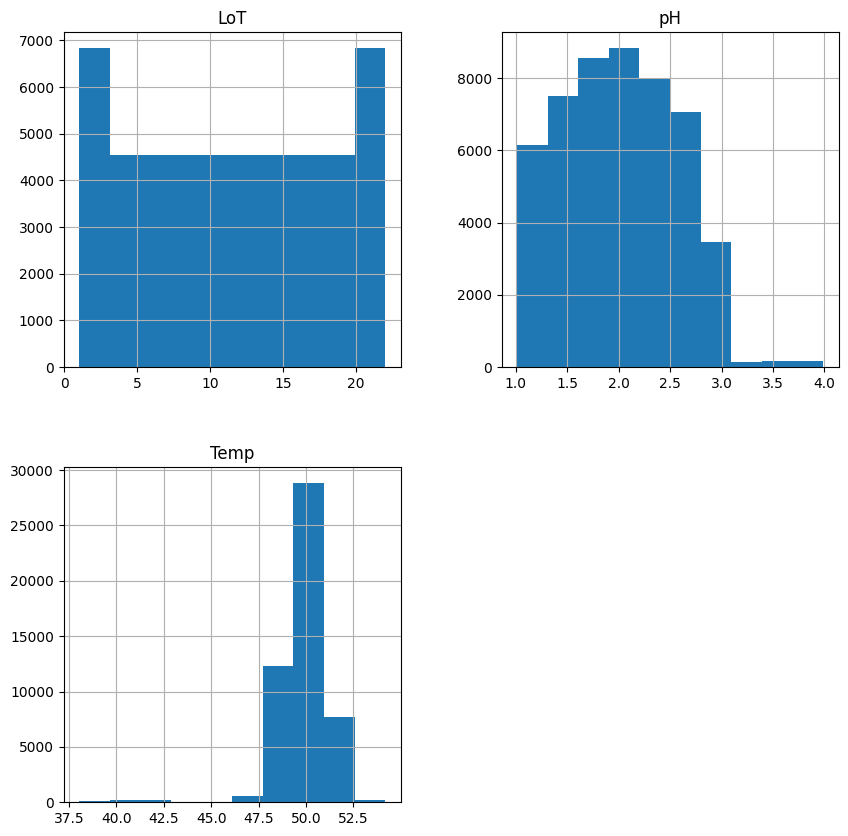

In [39]:
dedicated_data.hist(figsize=(10,10))


In [40]:
correlation = dedicated_data.corr()
correlation

<ipython-input-40-a336a0ace2c0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dedicated_data.corr()


,LoT,pH,Temp
LoT,1.000000,-0.001943,0.011561
pH,-0.001943,1.000000,0.474920
Temp,0.011561,0.474920,1.000000


<Axes: >

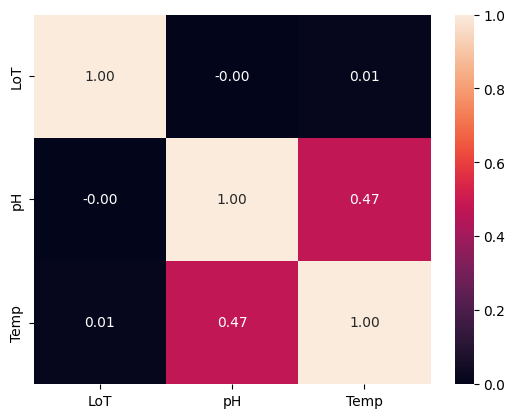

In [41]:
sns.heatmap(correlation, annot=True, fmt='.2f')


In [42]:
dedicated_data = dedicated_data.dropna()
dedicated_data

,LoT,pH,Temp,DTime
Time,,,,
2021-09-06 09:01:18,1,1.02,47.18,2021-09-06
2021-09-06 09:01:23,1,1.05,47.34,2021-09-06
2021-09-06 09:01:28,1,1.09,48.45,2021-09-06
2021-09-06 09:01:33,1,1.12,48.46,2021-09-06
2021-09-06 09:01:38,1,1.15,48.47,2021-09-06
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,2021-10-27
2021-10-27 11:14:46,22,3.62,42.20,2021-10-27
2021-10-27 11:14:51,22,3.40,41.88,2021-10-27


In [43]:
lot_lists = dedicated_data['LoT'].unique()
print(lot_lists)
print(len(lot_lists))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
22


In [44]:
d_lists = dedicated_data['DTime'].unique()
print(d_lists)
print(len(d_lists))

['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']
33


In [45]:
process = pd.read_csv(os.path.join(root_dir, error_list), sep=',', encoding='utf-8')
process

,Date,LoT,Process Rate
0,2021-09-06,1,96.38
1,2021-09-06,2,97.40
2,2021-09-06,3,95.40
3,2021-09-06,4,96.35
4,2021-09-06,5,94.77
...,...,...,...
721,2021-10-27,18,97.29
722,2021-10-27,19,97.21
723,2021-10-27,20,98.38
724,2021-10-27,21,98.36


In [46]:
lot_process_lists = process['LoT'].unique()
d_process_lists = process['Date'].unique()
print("Unique LoT List : ", lot_process_lists)
print("Unique Date List : ", d_process_lists)

Unique LoT List :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Unique Date List :  ['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']


In [47]:
# 트레이닝 데이터셋 만들기
X_data = pd.DataFrame(columns=['pH','Temp', 'LoT', 'Process'])

for d in d_lists:
    for lot in lot_lists:
        tmp = dedicated_data[(dedicated_data['DTime']==d)&(dedicated_data['LoT']==lot)]
        tmp = tmp[['pH', 'Temp', 'LoT']]
        process_val = process[(process['Date']==d)&((process['LoT']==lot))]['Process Rate'].values
        trr = np.full((tmp['pH'].shape), process_val)
        tmp['Process'] = trr
        X_data = X_data.append(tmp)
X_data=X_data.apply(pd.to_numeric)
X_data = X_data[['LoT', 'pH', 'Temp', 'Process']]

<ipython-input-47-377af4f04b9b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(tmp)
<ipython-input-47-377af4f04b9b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(tmp)
<ipython-input-47-377af4f04b9b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(tmp)
<ipython-input-47-377af4f04b9b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(tmp)
<ipython-input-47-377af4f04b9b>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(tmp)
<ipyt

In [48]:
X_data.describe()

,LoT,pH,Temp,Process
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,11.500000,2.006488,49.876127,96.064229
std,6.344352,0.551698,1.345322,3.210621
min,1.000000,1.010000,38.020000,80.780000
25%,6.000000,1.560000,49.280000,96.170000
50%,11.500000,2.000000,49.970000,96.635000
75%,17.000000,2.440000,50.630000,97.260000
max,22.000000,3.990000,54.190000,98.450000


In [49]:
train_data, test_data = train_test_split(X_data, test_size=0.2)

In [50]:
train_data.describe()

,LoT,pH,Temp,Process
count,40075.000000,40075.000000,40075.000000,40075.000000
mean,11.499988,2.007115,49.875062,96.061767
std,6.339292,0.552928,1.349193,3.213325
min,1.000000,1.010000,38.020000,80.780000
25%,6.000000,1.560000,49.280000,96.170000
50%,11.000000,2.000000,49.970000,96.630000
75%,17.000000,2.440000,50.640000,97.260000
max,22.000000,3.990000,54.190000,98.450000


In [51]:
train_data.corr()

,LoT,pH,Temp,Process
LoT,1.000000,-0.006018,0.009732,0.297953
pH,-0.006018,1.000000,0.472568,-0.016372
Temp,0.009732,0.472568,1.000000,0.144620
Process,0.297953,-0.016372,0.144620,1.000000


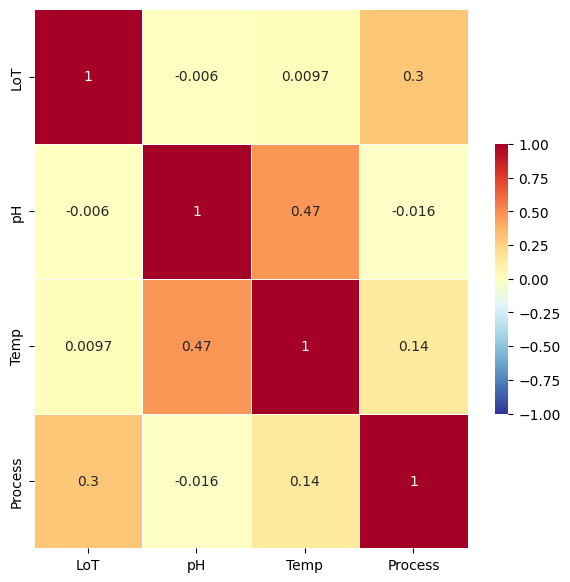

In [52]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(train_data.corr(), cmap='RdYlBu_r', annot =True, linewidths=0.5, cbar_kws={"shrink":.5}, vmin=-1, vmax=1)
plt.show()

In [53]:
test_data.describe()

,LoT,pH,Temp,Process
count,10019.000000,10019.000000,10019.000000,10019.000000
mean,11.500050,2.003981,49.880387,96.074074
std,6.364869,0.546769,1.329780,3.199922
min,1.000000,1.010000,38.270000,80.780000
25%,6.000000,1.570000,49.280000,96.170000
50%,12.000000,1.990000,49.950000,96.640000
75%,17.000000,2.430000,50.630000,97.260000
max,22.000000,3.990000,54.020000,98.450000


In [54]:
test_data.corr()

,LoT,pH,Temp,Process
LoT,1.000000,0.014477,0.018957,0.28574
pH,0.014477,1.000000,0.484602,-0.01500
Temp,0.018957,0.484602,1.000000,0.13428
Process,0.285740,-0.015000,0.134280,1.00000


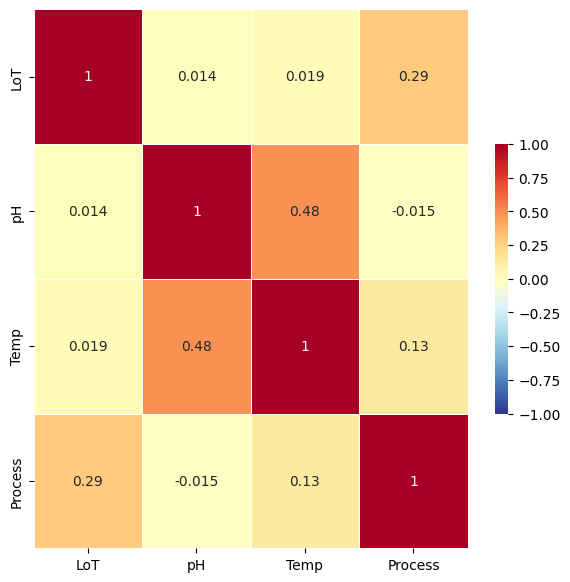

In [55]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(test_data.corr(), cmap='RdYlBu_r', annot =True, linewidths=0.5, cbar_kws={"shrink":.5}, vmin=-1, vmax=1)
plt.show()

In [56]:
clf = tree.DecisionTreeRegressor()

In [57]:
clf = clf.fit(train_data[['pH','Temp']], train_data[['Process']])

In [58]:
new_clf = tree.DecisionTreeRegressor(max_depth=3)
new_clf = new_clf.fit(train_data[['pH','Temp']], train_data[['Process']])

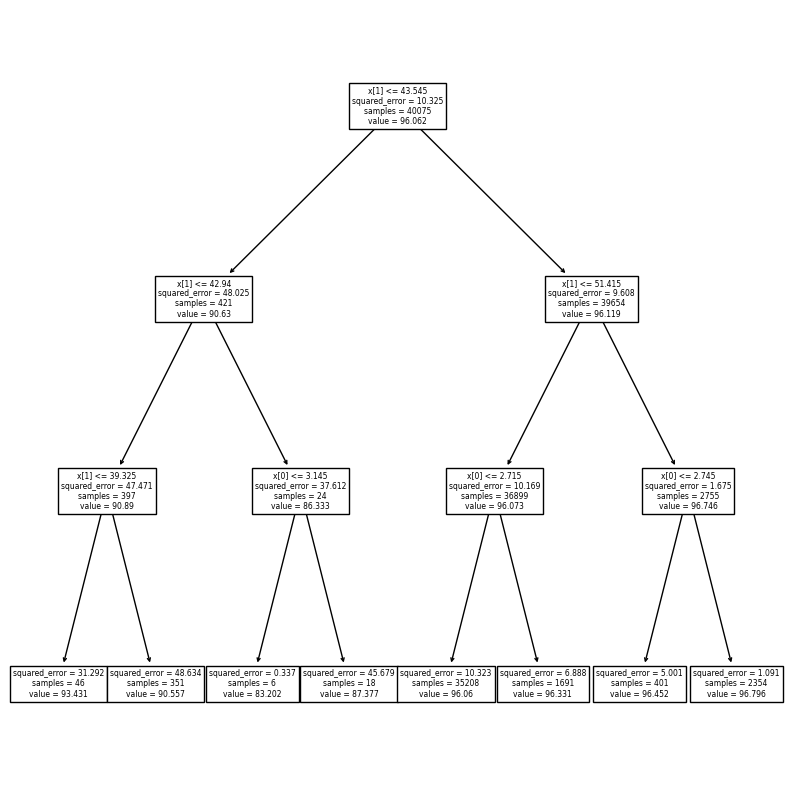

In [59]:
plt.figure(figsize=(10, 10))
tree.plot_tree(new_clf)
plt.show()

In [60]:
predicted_data = clf.predict(test_data[['pH', 'Temp']])
print('Decision Tree Model Predict : ', predicted_data)
rmse = sqrt(mean_squared_error(test_data['Process'], predicted_data))
print('Decision Tree Model RMSE : ',rmse)

Decision Tree Model Predict :  [96.165      92.35666667 96.51666667 ... 96.19       95.91
 94.53      ]
Decision Tree Model RMSE :  3.984110926414697


In [61]:
y_test = test_data['Process']
y_test = [round(y, 0) for y in y_test]
y_pred = [round(y, 0) for y in predicted_data]
print("accuracy = ", accuracy_score(y_test, y_pred))

accuracy =  0.324283860664737


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        56
        82.0       0.07      0.03      0.04       117
        83.0       0.02      0.01      0.01       208
        84.0       0.07      0.04      0.05       141
        86.0       0.00      0.00      0.00         0
        87.0       0.00      0.00      0.00         0
        88.0       0.00      0.00      0.00         0
        89.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        92.0       0.00      0.00      0.00         0
        93.0       0.00      0.00      0.00         0
        94.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00        40
        96.0       0.36      0.25      0.30      3589
        97.0       0.42      0.53      0.46      4120
        98.0       0.17      0.09      0.11      1748

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# 튜닝한 모델 평가
predicted_data = new_clf.predict(test_data[['pH', 'Temp']])
print('Decision Tree Model Predict : ', predicted_data)
rmse = sqrt(mean_squared_error(test_data['Process'], predicted_data))
print('Decision Tree Model RMSE : ',rmse)

Decision Tree Model Predict :  [96.06023603 96.06023603 96.06023603 ... 96.79607477 90.55663818
 96.06023603]
Decision Tree Model RMSE :  3.1577913743576786


In [64]:
y_test = test_data['Process']
y_test = [round(y, 0) for y in y_test]
y_pred = [round(y, 0) for y in predicted_data]
print("accuracy = ", accuracy_score(y_test, y_pred))


accuracy =  0.36071464217985827


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        56
        82.0       0.00      0.00      0.00       117
        83.0       0.00      0.00      0.00       208
        84.0       0.00      0.00      0.00       141
        87.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        93.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00        40
        96.0       0.36      0.93      0.52      3589
        97.0       0.44      0.06      0.11      4120
        98.0       0.00      0.00      0.00      1748

    accuracy                           0.36     10019
   macro avg       0.07      0.09      0.06     10019
weighted avg       0.31      0.36      0.23     10019



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [67]:
rate = pd.read_csv("./dataset/kemp-process-rate.csv")
rate.describe()

,LoT,Process Rate
count,726.000000,726.000000
mean,11.500000,96.064229
std,6.348663,3.212802
min,1.000000,80.780000
25%,6.000000,96.172500
50%,11.500000,96.635000
75%,17.000000,97.257500
max,22.000000,98.450000


In [68]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          726 non-null    object 
 1   LoT           726 non-null    int64  
 2   Process Rate  726 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.1+ KB


In [69]:
rate

,Date,LoT,Process Rate
0,2021-09-06,1,96.38
1,2021-09-06,2,97.40
2,2021-09-06,3,95.40
3,2021-09-06,4,96.35
4,2021-09-06,5,94.77
...,...,...,...
721,2021-10-27,18,97.29
722,2021-10-27,19,97.21
723,2021-10-27,20,98.38
724,2021-10-27,21,98.36
